In [1]:
import numpy as np
from numpy import nan,log
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier



# import some data to play with
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

pokemon = load_dataset('Pokemon.csv')
pokemon.head()
dataset=pokemon

In [2]:
pokemon.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
pokemon.describe

<bound method NDFrame.describe of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     

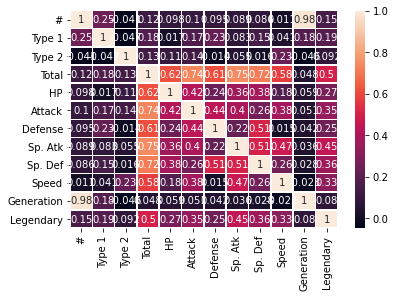

In [4]:
import seaborn as sns

dataset['Type 1'] = dataset['Type 1'].replace(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
dataset['Type 2'] = dataset['Type 2'].replace(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying', 0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 0])
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [5]:
pokemon['Type 2'] = pokemon['Type 2'].fillna(0)
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,1,6.0,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,1,6.0,405,60,62,63,80,80,60,1,False
2,3,Venusaur,1,6.0,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,1,6.0,625,80,100,123,122,120,80,1,False
4,4,Charmander,2,0.0,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,12,9.0,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,12,9.0,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,11,13.0,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,11,16.0,680,80,160,60,170,130,80,6,True


In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'Legendary']
targets  = ['Type1Id']



In [7]:
pokemon['Type1Id'] = pokemon['Type 1'].rank(method='dense').astype(int)
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type1Id
0,1,Bulbasaur,1,6.0,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,1,6.0,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,1,6.0,525,80,82,83,100,100,80,1,False,1
3,3,VenusaurMega Venusaur,1,6.0,625,80,100,123,122,120,80,1,False,1
4,4,Charmander,2,0.0,309,39,52,43,60,50,65,1,False,2


In [8]:
df_norm = pokemon.copy()
df_norm[features] = StandardScaler().fit(pokemon[features]).transform(pokemon[features])


Estandaritzem el dataset i apliquem el TSNE i el PCA

In [9]:
X_tsne = TSNE(learning_rate=500, n_components=2).fit_transform(df_norm[features])
X_pca = PCA().fit_transform(df_norm[features])

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

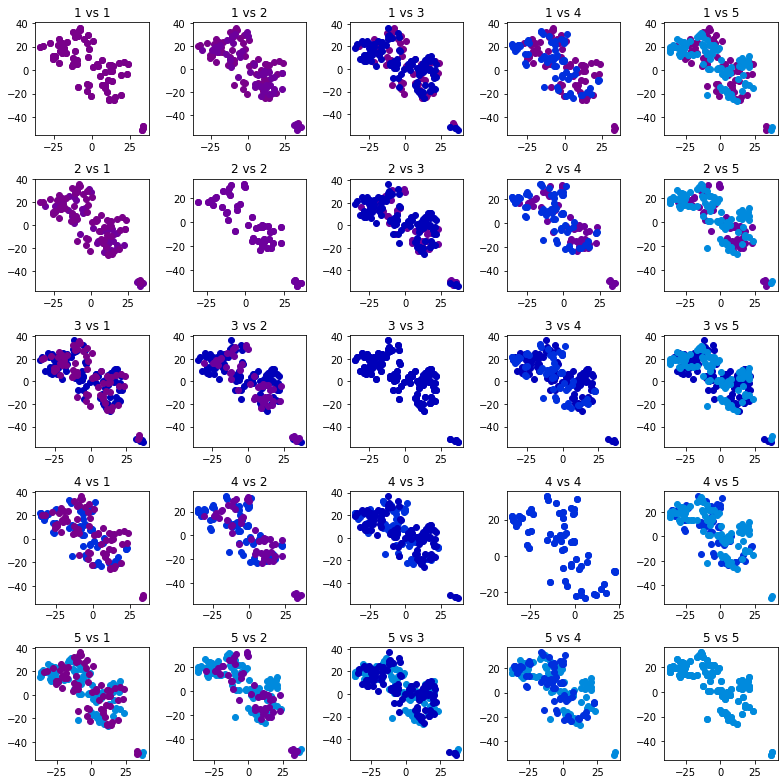

In [10]:
fig = plt.figure(figsize=(11, 11))

cmap = plt.get_cmap('nipy_spectral')
types1 = pokemon['Type 1'].unique()
type1_ids = pokemon['Type1Id'].unique()
num_types1 = len(types1)

rows, cols = 5, 5
num = 1
for row, t1_id, t1 in zip(range(rows), type1_ids, types1):
    for col, t2_id, t2 in zip(range(cols), type1_ids, types1):
        plt.subplot(rows,cols,num)
        X_i = X_tsne[np.where(pokemon['Type1Id'] == t1_id)[0]]
        X_j = X_tsne[np.where(pokemon['Type1Id'] == t2_id)[0]]
        plt.scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / num_types1))
        plt.scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / num_types1))
        plt.title(str(t1) + ' vs ' + str(t2))
        num += 1
fig.tight_layout()

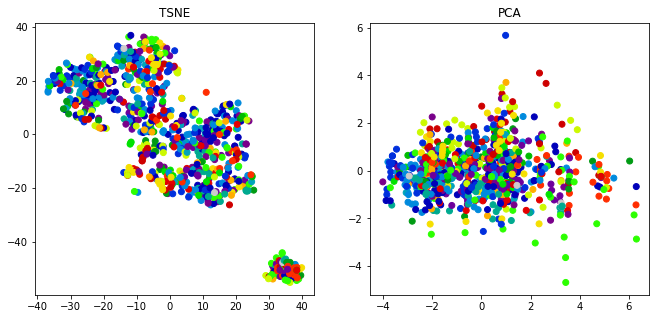

In [11]:
plt.figure(figsize=(11, 5))
cmap = plt.get_cmap('nipy_spectral')

plt.subplot(1,2,1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(pokemon['Type1Id'] / num_types1))
plt.title('TSNE')
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(pokemon['Type1Id'] / num_types1))
plt.title('PCA');

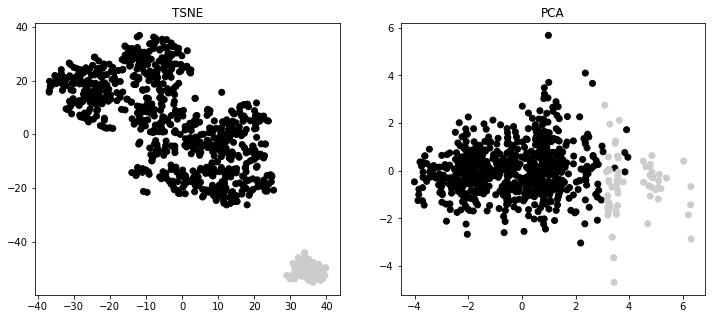

In [12]:
plt.figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

plt.subplot(1,2,1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(pokemon['Legendary'] * 1.))
plt.title('TSNE')
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(pokemon['Legendary'] * 1.));
plt.title('PCA');

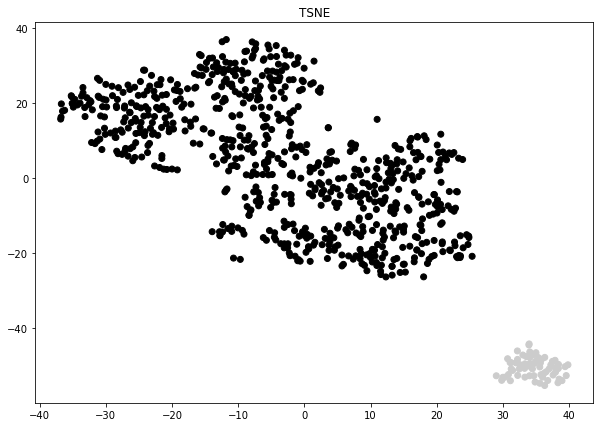

In [13]:
plt.figure(figsize=(10, 7))
cmap = plt.get_cmap('nipy_spectral')

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(pokemon['Legendary'] * 1.))
plt.title('TSNE');

In [14]:
pokemon = pokemon[~pokemon['Legendary']]

df_norm = pokemon.copy()
df_norm[features] = StandardScaler().fit(pokemon[features]).transform(pokemon[features])

X_tsne = TSNE(learning_rate=600, n_components=2).fit_transform(df_norm[features])
X_pca = PCA().fit_transform(df_norm[features])

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

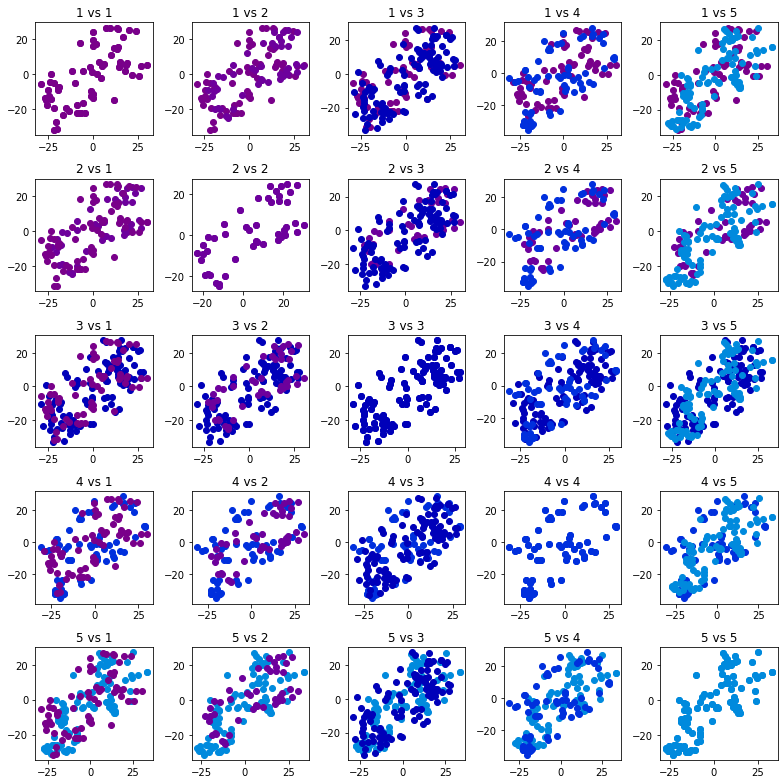

In [15]:
fig = plt.figure(figsize=(11, 11))

cmap = plt.get_cmap('nipy_spectral')
types1 = pokemon['Type 1'].unique()
type1_ids = pokemon['Type1Id'].unique()
num_types1 = len(types1)

rows, cols = 5, 5
num = 1
for row, t1_id, t1 in zip(range(rows), type1_ids, types1):
    for col, t2_id, t2 in zip(range(cols), type1_ids, types1):
        plt.subplot(rows,cols,num)
        X_i = X_tsne[np.where(pokemon['Type1Id'] == t1_id)[0]]
        X_j = X_tsne[np.where(pokemon['Type1Id'] == t2_id)[0]]
        plt.scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / num_types1))
        plt.scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / num_types1))
        plt.title(str(t1) + ' vs ' + str(t2))
        num += 1
fig.tight_layout()

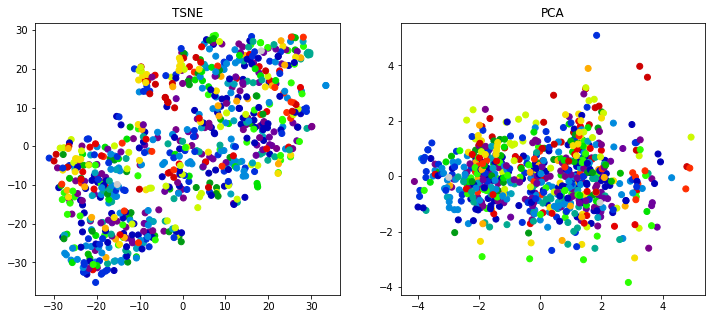

In [16]:
plt.figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

plt.subplot(1,2,1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(pokemon['Type1Id'] / num_types1))
plt.title('TSNE')
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(pokemon['Type1Id'] / num_types1))
plt.title('PCA');


In [17]:
from sklearn.cluster import KMeans

num_clusters = 4
features0 = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
kmeans_tsne = KMeans(n_clusters=num_clusters).fit(X_tsne)
kmeans_pca = KMeans(n_clusters=num_clusters).fit(X_pca)

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


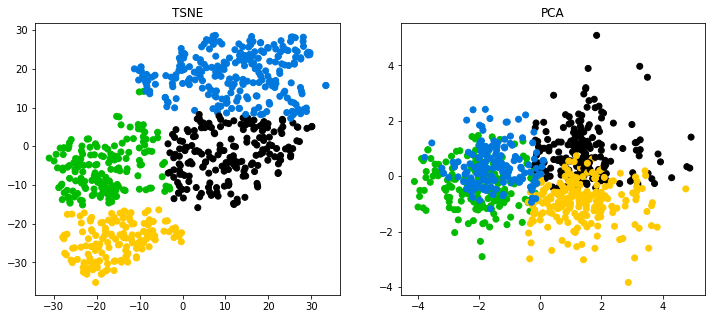

In [18]:
plt.figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

plt.subplot(1,2,1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters))
plt.title('TSNE')
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(kmeans_pca.labels_ / num_clusters))
plt.title('PCA');

In [19]:
df_norm['tsne_cluster'] = kmeans_tsne.labels_
df_norm['pca_cluster'] = kmeans_pca.labels_
df_tsne_mean = df_norm.groupby('tsne_cluster').mean()
df_pca_mean = df_norm.groupby('pca_cluster').mean()

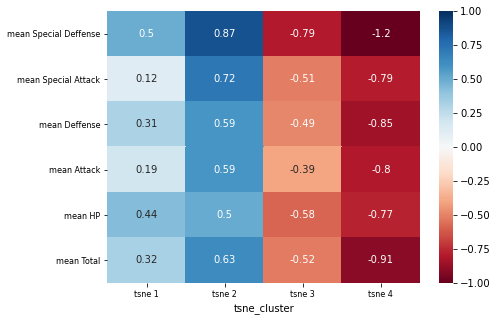

In [20]:
import seaborn as sns

plt.figure(figsize=(7, 5))
ax = sns.heatmap(df_tsne_mean[features0].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['tsne ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(['mean Total', 'mean HP', 'mean Attack', 'mean Deffense', 'mean Special Attack',
                    'mean Special Deffense'][::-1], rotation=0, fontsize=8);

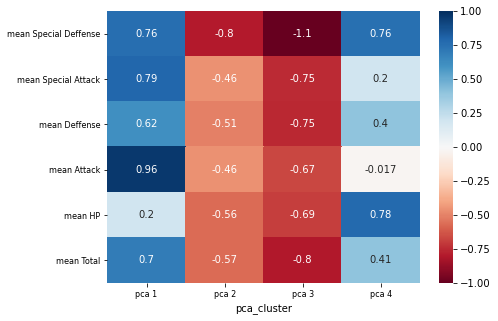

In [21]:
plt.figure(figsize=(7, 5))
ax = sns.heatmap(df_pca_mean[features0].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['pca ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(['mean Total', 'mean HP', 'mean Attack', 'mean Deffense', 'mean Special Attack',
                    'mean Special Deffense'][::-1], rotation=0, fontsize=8);

In [22]:
dataset.Legendary.replace({True:1,False:0},inplace=True)
d2=dataset
x = d2.drop(["Legendary","Name"],axis=1)
y = dataset.Legendary

In [33]:
from sklearn.model_selection import train_test_split

for j in (0.1,0.2,0.33,0.4,0.5):
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 2,test_size=j,stratify=y)


    from sklearn.neighbors import KNeighborsClassifier


    test_scores = []
    train_scores = []

    for i in range(1,15):
        start = time.time()

        knn = KNeighborsClassifier(i)
        knn.fit(X_train,y_train)
        end = time.time()
        print("El temps empleat ha sigut:",end - start, "amb k=", i, " i amb test = ",j)

        train_scores.append(knn.score(X_train,y_train))
        test_scores.append(knn.score(X_test,y_test))

    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print('Valor de test_size:',j)
    print('Max train score {} % i k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print('Max test score {} % i k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
    print('')

El temps empleat ha sigut: 0.002998828887939453 amb k= 1  i amb test =  0.1
El temps empleat ha sigut: 0.003000020980834961 amb k= 2  i amb test =  0.1
El temps empleat ha sigut: 0.0030329227447509766 amb k= 3  i amb test =  0.1
El temps empleat ha sigut: 0.002996683120727539 amb k= 4  i amb test =  0.1
El temps empleat ha sigut: 0.004002809524536133 amb k= 5  i amb test =  0.1
El temps empleat ha sigut: 0.006001472473144531 amb k= 6  i amb test =  0.1
El temps empleat ha sigut: 0.0020017623901367188 amb k= 7  i amb test =  0.1
El temps empleat ha sigut: 0.0030035972595214844 amb k= 8  i amb test =  0.1
El temps empleat ha sigut: 0.002000093460083008 amb k= 9  i amb test =  0.1
El temps empleat ha sigut: 0.0019998550415039062 amb k= 10  i amb test =  0.1
El temps empleat ha sigut: 0.0030002593994140625 amb k= 11  i amb test =  0.1
El temps empleat ha sigut: 0.005000114440917969 amb k= 12  i amb test =  0.1
El temps empleat ha sigut: 0.003000497817993164 amb k= 13  i amb test =  0.1
El 

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 2,test_size=0.33,stratify=y)


from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):
    start = time.time()
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    end = time.time()
    print("El temps empleat ha sigut:",end - start, "amb k=", i)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Valor de test_size:',j)
print('Max train score {} % i k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % i k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


El temps empleat ha sigut: 0.0029981136322021484 amb k= 1
El temps empleat ha sigut: 0.0030002593994140625 amb k= 2
El temps empleat ha sigut: 0.0030024051666259766 amb k= 3
El temps empleat ha sigut: 0.003999948501586914 amb k= 4
El temps empleat ha sigut: 0.003000020980834961 amb k= 5
El temps empleat ha sigut: 0.003999948501586914 amb k= 6
El temps empleat ha sigut: 0.003999471664428711 amb k= 7
El temps empleat ha sigut: 0.0019989013671875 amb k= 8
El temps empleat ha sigut: 0.003000020980834961 amb k= 9
El temps empleat ha sigut: 0.003000497817993164 amb k= 10
El temps empleat ha sigut: 0.002995014190673828 amb k= 11
El temps empleat ha sigut: 0.0039997100830078125 amb k= 12
El temps empleat ha sigut: 0.001997709274291992 amb k= 13
El temps empleat ha sigut: 0.0040013790130615234 amb k= 14
Valor de test_size: 0.5
Max train score 100.0 % i k = [1]
Max test score 96.96969696969697 % i k = [1]


C:\Users\oscar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


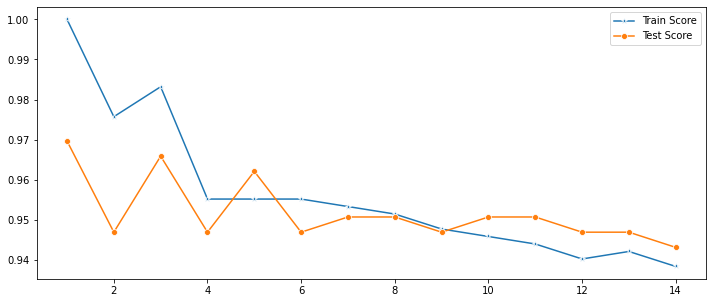

In [25]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Text(0.5, 15.0, 'Predicted label')

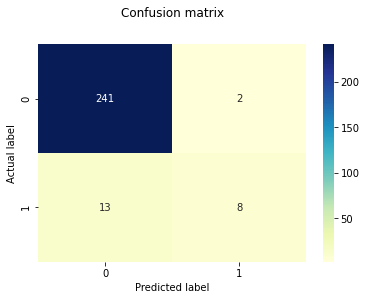

In [26]:
y_pred = knn.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import tree
import time


particions = [0.5, 0.7, 0.8]


for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(x, y, train_size=part)
    
    #Creem el regresor logístic
    start = time.time()
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
    end = time.time()
    print("El temps empleat ha sigut:",end - start)
    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
     
    #Probem el SVM
    start = time.time()

    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    end = time.time()
    print("El temps empleat ha sigut:",end - start, "amb kernel= rbf")
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #Probem el SVM
    start = time.time()

    svc = svm.SVC(C=20.0, kernel='linear', gamma=0.9, probability=True)
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    end = time.time()
    print("El temps empleat ha sigut:",end - start, "amb kernel= lineal")
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))
    
    # Probem l'algorisme KNN
    start = time.time()

    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(x_t, y_t)
    y_pred = knn.predict(x_v)
    end = time.time()
    print("El temps empleat ha sigut:",end - start)
    print ("Correct classification KNN      ", part, "% of the data: ", knn.score(x_v, y_v))
    
    # Probem l'algorisme Bagging
    start = time.time()

    clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=2),max_samples=0.5,max_features=0.5)
    clf.fit(x_t,y_t)
    y_pred = clf.predict(x_v)
    end = time.time()
    print("El temps empleat ha sigut:",end - start)
    print ("Correct classification Ensemble      ", part, "% of the data: ", clf.score(x_v, y_v))
    
    #Decission Tree
    start = time.time()

    clf = tree.DecisionTreeClassifier()
    clf.fit(x_t,y_t)
    y_pred = clf.predict(x_v)
    end = time.time()
    print("El temps empleat ha sigut:",end - start)
    print ("Correct classification Decision Tree      ", part, "% of the data: ", clf.score(x_v, y_v))

    #Random Forest
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(x_t,y_t)
    y_pred = clf.predict(x_v)
    end = time.time()
    print("El temps empleat ha sigut:",end - start)
    print ("Correct classification Random Forest  100     ", part, "% of the data: ", clf.score(x_v, y_v))
    
    
    #Random Forest
    clf = RandomForestClassifier(n_estimators=1000)
    clf.fit(x_t,y_t)
    y_pred = clf.predict(x_v)
    end = time.time()
    print("El temps empleat ha sigut:",end - start)
    print ("Correct classification Random Forest  1000     ", part, "% of the data: ", clf.score(x_v, y_v))
    

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El temps empleat ha sigut: 0.03399848937988281
Correct classification Logistic  0.5 % of the data:  0.93
El temps empleat ha sigut: 1.1470000743865967 amb kernel= rbf
Correct classification SVM       0.5 % of the data:  0.9125
El temps empleat ha sigut: 29.476563930511475 amb kernel= lineal
Correct classification SVM       0.5 % of the data:  0.96
El temps empleat ha sigut: 0.01600027084350586
Correct classification KNN       0.5 % of the data:  0.94
El temps empleat ha sigut: 0.027004003524780273
Correct classification Ensemble       0.5 % of the data:  0.9475
El temps empleat ha sigut: 0.003997802734375
Correct classification Decision Tree       0.5 % of the data:  0.955
El temps empleat ha sigut: 0.2039651870727539
Correct classification Random Forest  100      0.5 % of the data:  0.9575
El temps empleat ha sigut: 1.8779969215393066
Correct classification Random Forest  1000      0.5 % of the data:  0.9625
El temps empleat ha sigut: 0.023959875106811523
Correct classification Logist

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El temps empleat ha sigut: 1.5450000762939453 amb kernel= rbf
Correct classification SVM       0.7 % of the data:  0.9333333333333333
El temps empleat ha sigut: 92.225581407547 amb kernel= lineal
Correct classification SVM       0.7 % of the data:  0.95
El temps empleat ha sigut: 0.011998414993286133
Correct classification KNN       0.7 % of the data:  0.9625
El temps empleat ha sigut: 0.028002500534057617
Correct classification Ensemble       0.7 % of the data:  0.9583333333333334
El temps empleat ha sigut: 0.003998279571533203
Correct classification Decision Tree       0.7 % of the data:  0.9916666666666667
El temps empleat ha sigut: 0.1740095615386963
Correct classification Random Forest  100      0.7 % of the data:  0.9541666666666667
El temps empleat ha sigut: 1.7019984722137451
Correct classification Random Forest  1000      0.7 % of the data:  0.9625
El temps empleat ha sigut: 0.021999120712280273
Correct classification Logistic  0.8 % of the data:  0.925


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El temps empleat ha sigut: 1.7145252227783203 amb kernel= rbf
Correct classification SVM       0.8 % of the data:  0.925
El temps empleat ha sigut: 144.4857165813446 amb kernel= lineal
Correct classification SVM       0.8 % of the data:  0.9625
El temps empleat ha sigut: 0.011000394821166992
Correct classification KNN       0.8 % of the data:  0.95
El temps empleat ha sigut: 0.029000282287597656
Correct classification Ensemble       0.8 % of the data:  0.95625
El temps empleat ha sigut: 0.005000591278076172
Correct classification Decision Tree       0.8 % of the data:  0.9875
El temps empleat ha sigut: 0.1810317039489746
Correct classification Random Forest  100      0.8 % of the data:  0.975
El temps empleat ha sigut: 1.8520309925079346
Correct classification Random Forest  1000      0.8 % of the data:  0.96875


El temps empleat ha sigut: 0.005036830902099609
Correct classification Decision Tree      0.7 % of the data:  0.97265625


Text(0.5, 15.0, 'Predicted label')

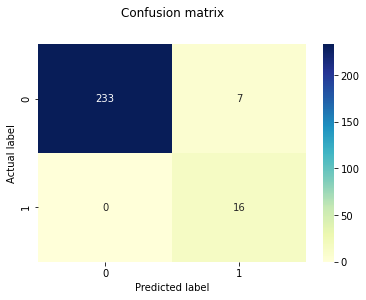

In [54]:
#Decission Tree
x_t, x_v, y_t, y_v = train_test_split(x, y, train_size=0.7)

start = time.time()

clf = tree.DecisionTreeClassifier()
clf.fit(x_t,y_t)
y_pred = clf.predict(x_v)
end = time.time()
print("El temps empleat ha sigut:",end - start)
print ("Correct classification Decision Tree      0.7 % of the data: ", clf.score(x_v, y_v))

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_v, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Github